# Analyzing Slack logs from NeIC channels

## TODO
- use examples from github.com/jalajthanaki/NLPython
- add fullstops at end of messages
- train sentiment analysis engine on some samples

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import json
import os
import sys
print(sys.version)
from __future__ import division

2.7.14 | packaged by conda-forge | (default, Nov  4 2017, 10:22:41) 
[GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]


### Get the raw data

In [3]:
%%bash
mkdir slack_logs
cd slack_logs
mv ../NeIC_Slack_export_Dec10_2017.zip .
unzip NeIC_Slack_export_Dec10_2017.zip
cd ..

Archive:  NeIC_Slack_export_Dec10_2017.zip


mkdir: slack_logs: File exists
mv: ../NeIC_Slack_export_Dec10_2017.zip: No such file or directory
replace random/2017-09-22.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [c]
replace random/2017-09-22.json? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(assuming [N]one)


### Inspect directory structure

In [4]:
%ls slack_logs/

2nd-ndsw/                         loke/
NeIC_Slack_export_Dec10_2017.zip  metacenter/
_aa/                              music/
aai/                              ndgf/
ahm/                              ndgf-247/
ahm-planning/                     ndgf_groupchat_nordu_/
ahm-social/                       neic2017/
ahm16/                            nimbus/
ahm17/                            nlpl/
arc-debugging/                    perfsonardeploy/
arc-operations/                   pmf/
bdi/                              poco/
ce-debugging/                     prjmgt/
channels.json                     random/
coc/                              robotics/
coderefinery/                     sc17/
data/                             sgas/
dcache/                           teamwork/
dellingr/                         tryggve/
docker/                           tryggve-d2/
esm/                              tryggve-d3/
fgi/                              tryggve-pm/
fla/                              tryggve-r

In [5]:
dirs = %sx ls -d slack_logs/*/
for n,i in enumerate(dirs):
    print(n,i)

(0, 'slack_logs/2nd-ndsw/')
(1, 'slack_logs/_aa/')
(2, 'slack_logs/aai/')
(3, 'slack_logs/ahm-planning/')
(4, 'slack_logs/ahm-social/')
(5, 'slack_logs/ahm/')
(6, 'slack_logs/ahm16/')
(7, 'slack_logs/ahm17/')
(8, 'slack_logs/arc-debugging/')
(9, 'slack_logs/arc-operations/')
(10, 'slack_logs/bdi/')
(11, 'slack_logs/ce-debugging/')
(12, 'slack_logs/coc/')
(13, 'slack_logs/coderefinery/')
(14, 'slack_logs/data/')
(15, 'slack_logs/dcache/')
(16, 'slack_logs/dellingr/')
(17, 'slack_logs/docker/')
(18, 'slack_logs/esm/')
(19, 'slack_logs/fgi/')
(20, 'slack_logs/fla/')
(21, 'slack_logs/general/')
(22, 'slack_logs/glenna/')
(23, 'slack_logs/hpc-core_conference_c/')
(24, 'slack_logs/kudohugbox/')
(25, 'slack_logs/loke/')
(26, 'slack_logs/metacenter/')
(27, 'slack_logs/music/')
(28, 'slack_logs/ndgf-247/')
(29, 'slack_logs/ndgf/')
(30, 'slack_logs/ndgf_groupchat_nordu_/')
(31, 'slack_logs/neic2017/')
(32, 'slack_logs/nimbus/')
(33, 'slack_logs/nlpl/')
(34, 'slack_logs/perfsonardeploy/')
(35, 's

#### Let's first try out one channel

In [6]:
#dir = dirs[3] #ahm-planning
dir = dirs[13] #coderefinery

os.listdir(dir)

['2016-02-22.json',
 '2016-03-08.json',
 '2016-03-09.json',
 '2016-03-10.json',
 '2016-03-11.json',
 '2016-03-18.json',
 '2016-03-31.json',
 '2016-04-03.json',
 '2016-04-04.json',
 '2016-04-12.json',
 '2016-04-14.json',
 '2016-05-01.json',
 '2016-05-02.json',
 '2016-05-11.json',
 '2016-05-17.json',
 '2016-05-20.json',
 '2016-05-22.json',
 '2016-05-23.json',
 '2016-06-13.json',
 '2016-06-14.json',
 '2016-06-20.json',
 '2016-07-07.json',
 '2016-07-08.json',
 '2016-07-29.json',
 '2016-08-16.json',
 '2016-08-17.json',
 '2016-08-22.json',
 '2016-08-29.json',
 '2016-08-30.json',
 '2016-09-02.json',
 '2016-09-06.json',
 '2016-09-07.json',
 '2016-09-12.json',
 '2016-09-13.json',
 '2016-09-14.json',
 '2016-09-22.json',
 '2016-09-27.json',
 '2016-09-28.json',
 '2016-09-29.json',
 '2016-09-30.json',
 '2016-10-03.json',
 '2016-10-04.json',
 '2016-10-05.json',
 '2016-10-06.json',
 '2016-10-07.json',
 '2016-10-08.json',
 '2016-10-09.json',
 '2016-10-10.json',
 '2016-10-11.json',
 '2016-10-12.json',


Look at the structure of the json files

In [7]:
dates = os.listdir(dir)
d = dates[0] 
with open(dir+d,"r") as f:
    raw_json = json.loads(f.read())
dump = json.dumps(raw_json,indent=4)
print(dump)


[
    {
        "subtype": "channel_join", 
        "type": "message", 
        "user": "U0A9NV7PX", 
        "ts": "1456141994.000002", 
        "text": "<@U0A9NV7PX> has joined the channel"
    }, 
    {
        "text": "<@U0KV7FVNV> has joined the channel", 
        "ts": "1456141994.000003", 
        "subtype": "channel_join", 
        "inviter": "U0A9NV7PX", 
        "type": "message", 
        "user": "U0KV7FVNV"
    }, 
    {
        "text": "Is the name now official? If yes, then I will set up a rudimentary website. This would help me to contact people, then I have a link to refer them to.", 
        "type": "message", 
        "user": "U0KV7FVNV", 
        "ts": "1456142521.000004"
    }
]


Aha, `subtype` only present if it's not a regular message

In [8]:
for j in raw_json:
    if "subtype" in j.keys():
        print (j["type"], j["subtype"], j["text"])
    else:
        print(j["type"], j["text"])


(u'message', u'channel_join', u'<@U0A9NV7PX> has joined the channel')
(u'message', u'channel_join', u'<@U0KV7FVNV> has joined the channel')
(u'message', u'Is the name now official? If yes, then I will set up a rudimentary website. This would help me to contact people, then I have a link to refer them to.')


### Preprocessing

We now extract all regular messages

In [9]:
dates = os.listdir(dir)
messages = []
for d in dates: 
    with open(dir+d,"r") as f:
        raw_json = json.loads(f.read())

    for j in raw_json:
        if not "subtype" in j.keys(): # exclude non-message messages
            messages.append(j["text"])

for m in messages:
    #print(m)
    if "install" in m:
        print m

1) In several places you mention and focus on "running"
the software, e.g. "impossible to run outside", "difference
between running and being robust", "tests to show to that
it actually runs". This is good and understandable in the Python/R
communities but in Fortran/C/C++-heavy physics/chemistry
communities building the software can be a barrier for users
and is of huge concern for portability (so is running but before the running
comes the building). If you want to mention
this and go this way, then you could recommend to use standard
build tools (Make, Autotools, CMake; the last would be my fav)
and not home-cooked configuration and build scripts.

2) [End of intro] "enough tests to show that it actually runs". It is a good
point and I understand why you emphasize this but for users
and in particular computing centers who install software for users
it is very important to easily verify whether the software is expected
to produce correct results. I feel that this is slightly more of 

Add all words in all messages to one list

In [10]:
import re
words = []
for m in messages:
    for w in m.split(): # split up words in messages
        #w = re.sub('\s+', '', w) # remove any whitespace character [ \t\n\r\f\v]
        # keep delimiters ,.!? by using regex group, and keep multiple symbols together
        w = re.split(r'([,.!?]+)', w)
        for ww in w: # split up delimiters
            if len(ww)>0: # get rid of empty strings
                words.append(ww)

    # add fullstop to end of messages if needed
    if not (re.match(r"[.,!?]", m[-1])):
        words.append(".")

#for m in messages:
    
words[-100:]

[u'could',
 u'attend',
 u'and',
 u'if',
 u'we',
 u'have',
 u'seats',
 u"i'll",
 u'advertise',
 u'more',
 u'on',
 u'Monday',
 '.',
 u'last',
 u'I',
 u'heard',
 u'3',
 u',',
 u'but',
 u"I'm",
 u'also',
 u'searching',
 u'for',
 u'others',
 u'who',
 u'may',
 u'want',
 u'to',
 u'come',
 '.',
 u'my',
 u'wife',
 u'.',
 u'gave',
 u'birth',
 u'to',
 u'a',
 u'baby',
 u'girl',
 u'yesterday',
 u',',
 u'little',
 u'earlier',
 u'than',
 u'expected',
 u'.',
 u'So',
 u'I',
 u'will',
 u'be',
 u'away',
 u'for',
 u'a',
 u'while',
 u'.',
 u'so',
 u'can',
 u'some',
 u'one',
 u'answer',
 u'the',
 u'ticket',
 u'about',
 u'setting',
 u'up',
 u'python',
 u'for',
 u'the',
 u'workshop',
 '.',
 u'congratulations',
 u',',
 u'Sabry',
 u',',
 u'best',
 u'wishes',
 u'for',
 u'Your',
 u'family',
 u'!',
 u'Thank',
 u'you',
 '.',
 u'Wonderful',
 u'news',
 u'!',
 u'Congratulations',
 u'!',
 u"don't",
 u'worry',
 u'about',
 u'the',
 u'ticket',
 u'.',
 u'wonderful',
 u'news',
 u',',
 u'congratulations',
 u'sabry',
 u'!!']

**Let's do this for all the Slack channels:**

In [11]:
channels = [d.replace("slack_logs/","").replace("/","") for d in dirs]
words_in_channels = dict.fromkeys(channels)
words_in_channels
#for d in dirs

{'2nd-ndsw': None,
 '_aa': None,
 'aai': None,
 'ahm': None,
 'ahm-planning': None,
 'ahm-social': None,
 'ahm16': None,
 'ahm17': None,
 'arc-debugging': None,
 'arc-operations': None,
 'bdi': None,
 'ce-debugging': None,
 'coc': None,
 'coderefinery': None,
 'data': None,
 'dcache': None,
 'dellingr': None,
 'docker': None,
 'esm': None,
 'fgi': None,
 'fla': None,
 'general': None,
 'glenna': None,
 'hpc-core_conference_c': None,
 'kudohugbox': None,
 'loke': None,
 'metacenter': None,
 'music': None,
 'ndgf': None,
 'ndgf-247': None,
 'ndgf_groupchat_nordu_': None,
 'neic2017': None,
 'nimbus': None,
 'nlpl': None,
 'perfsonardeploy': None,
 'pmf': None,
 'poco': None,
 'prjmgt': None,
 'random': None,
 'robotics': None,
 'sc17': None,
 'sgas': None,
 'teamwork': None,
 'tryggve': None,
 'tryggve-d2': None,
 'tryggve-d3': None,
 'tryggve-pm': None,
 'tryggve-rg': None,
 'tryggve2': None,
 'web': None,
 'xt': None}

In [12]:
# function to join messages into one long array
import re
def join_messages(messages):
    words = []
    for m in messages:
        for w in m.split(): # split up words in messages
            # not needed with python split() method...
            #w = re.sub('\s+', '', w) # remove any whitespace character [ \t\n\r\f\v]
            # keep delimiters ,.!? by using re group, and keep multiple symbols together
            w = re.split(r'([,.!?]+)', w)
            for ww in w: # split up delimiters
                if len(ww)>0: # get rid of empty strings
                    words.append(ww.lower()) # make all strings lowercase

        # add fullstop to end of messages if needed
        if len(m)>0: # need to exclude empty messages
            if not (re.match(r"[.,!?]", m[-1])):
                words.append(".")

    return words


In [13]:

for channel in channels:
    print("channel %s"%channel)
    dates = os.listdir("slack_logs/"+channel)
    messages = []
    for d in dates: 
        with open("slack_logs/"+channel+"/"+d,"r") as f:
            raw_json = json.loads(f.read())

        for j in raw_json:
            if not "subtype" in j.keys(): # exclude non-message messages
                messages.append(j["text"])
    words_in_channels[channel] = join_messages(messages)
#for m in messages:
#    print(m)

channel 2nd-ndsw
channel _aa
channel aai
channel ahm-planning
channel ahm-social
channel ahm
channel ahm16
channel ahm17
channel arc-debugging
channel arc-operations
channel bdi
channel ce-debugging
channel coc
channel coderefinery
channel data
channel dcache
channel dellingr
channel docker
channel esm
channel fgi
channel fla
channel general
channel glenna
channel hpc-core_conference_c
channel kudohugbox
channel loke
channel metacenter
channel music
channel ndgf-247
channel ndgf
channel ndgf_groupchat_nordu_
channel neic2017
channel nimbus
channel nlpl
channel perfsonardeploy
channel pmf
channel poco
channel prjmgt
channel random
channel robotics
channel sc17
channel sgas
channel teamwork
channel tryggve-d2
channel tryggve-d3
channel tryggve-pm
channel tryggve-rg
channel tryggve
channel tryggve2
channel web
channel xt


In [14]:
for i in words_in_channels.keys():
    #print("number of words in channel %s is %d "%(i,len(words_in_channels[i])))
    if len(words_in_channels[i])==0:
        words_in_channels.pop(i, None)
for i in words_in_channels.keys():
    print("number of words in channel %s is %d "%(i,len(words_in_channels[i])))
        


number of words in channel tryggve-pm is 18087 
number of words in channel tryggve-rg is 61 
number of words in channel tryggve is 63539 
number of words in channel ndgf-247 is 2743 
number of words in channel general is 64566 
number of words in channel pmf is 4742 
number of words in channel neic2017 is 31696 
number of words in channel xt is 153933 
number of words in channel loke is 19 
number of words in channel web is 63528 
number of words in channel tryggve2 is 254 
number of words in channel arc-operations is 1327 
number of words in channel bdi is 1012 
number of words in channel poco is 6890 
number of words in channel music is 2630 
number of words in channel kudohugbox is 773 
number of words in channel robotics is 776 
number of words in channel teamwork is 249 
number of words in channel esm is 765 
number of words in channel random is 92441 
number of words in channel ahm16 is 5447 
number of words in channel ahm17 is 45 
number of words in channel dellingr is 307 
numb

(0, 200000)

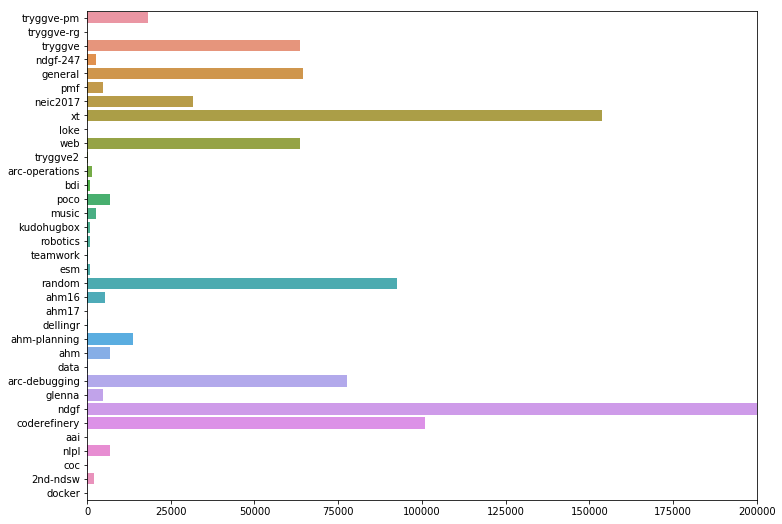

In [15]:
plt.rcParams["figure.figsize"] = [12,9]
x = words_in_channels.keys()
y = [len(words_in_channels[i]) for i in words_in_channels.keys()]
ax = sns.barplot(x=y, y=x)

ax.set_xlim([0,200000])

From now on, let's focus on the largest channels

In [16]:
channels = ["tryggve","general","xt","web","random","arc-debugging","ndgf","coderefinery"]

### Simple natural language processing

Natural language toolkit tests

In [17]:
import nltk as nltk

 > Note: lots of extra packages need to be downloaded with `nltk.download()`

Frequency distribution of words

In [18]:
#sorted(set(words))
most_common = dict.fromkeys(channels,0)
dists = dict.fromkeys(channels,0)
for channel in channels:
    words = words_in_channels[channel]
    dist = nltk.FreqDist(words)
    dists[channel] = dist
    most_common[channel] = dist.most_common(20)


In [19]:
type(dist)

nltk.probability.FreqDist

In [20]:
type(most_common["coderefinery"][0])

tuple

In [21]:
words = words_in_channels["coderefinery"]
" ".join(words)
#words.index("alwaysinstall")

u'is the name now official ? if yes , then i will set up a rudimentary website . this would help me to contact people , then i have a link to refer them to . <@u0kv7fvnv> do you have any connections to <https://www . esciencecenter . nl> or eu open science cloud ? i just met barend mons who is involved in those efforts at a high level , as well as heads up elixir nl . he says they\'re trying to get rid of "professorware" . would this be a useful connection for you ? thanks joel . so far no connection but i will take contact . this would be a very useful connection . thanks ! how would you like to interact in this stage ? getting input on important aspects of setting up this activity ? finding useful ways of interacting in the future ? i am today setting up the coderefinery website with some general information . then i could just write to barend so that they know about us . or , if you like , i could write to introduce you . that way he\u2019ll know precisely who you are from the start

We create a dataframe to work with:

In [22]:
df = pd.DataFrame(data=most_common)
df.head(30)

,arc-debugging,coderefinery,general,ndgf,random,tryggve,web,xt
0,"(., 7377)","(., 6682)","(., 4981)","(., 137892)","(., 7545)","(., 5807)","(., 5131)","(., 12970)"
1,"(the, 2819)","(the, 3451)","(,, 2123)","(the, 44224)","(the, 3120)","(the, 1993)","(the, 2276)","(,, 5274)"
2,"(,, 2441)","(to, 2927)","(the, 2035)","(,, 42199)","(,, 2917)","(,, 1765)","(,, 2163)","(the, 5209)"
3,"(to, 1521)","(,, 2738)","(to, 1638)","(to, 28195)","(to, 2064)","(to, 1608)","(to, 1741)","(to, 3767)"
4,"(is, 1346)","(i, 2553)","(i, 1255)","(i, 20131)","(a, 1854)","(i, 1297)","(i, 1297)","(i, 2887)"
5,"(i, 1258)","(and, 1719)","(a, 1015)","(it, 19853)","(i, 1621)","(?, 977)","(a, 1030)","(?, 2423)"
6,"(it, 1133)","(a, 1685)","(and, 968)","(?, 18728)","(of, 1286)","(you, 897)","(it, 944)","(a, 2162)"
7,"(a, 1043)","(we, 1497)","(is, 864)","(is, 18423)","(and, 1272)","(a, 824)","(is, 825)","(in, 2090)"
8,"(?, 1034)","(it, 1450)","(it, 857)","(a, 16716)","(in, 1208)","(in, 798)","(?, 824)","(and, 2075)"
9,"(in, 944)","(is, 1440)","(in, 810)","(and, 14484)","(is, 1175)","(is, 763)","(that, 785)","(for, 1994)"


In [23]:
common_words = []
for index, row in df.iterrows():
    for r in row:
        common_words.append(r[0])
common_words = set(common_words)
common_words

{u'!',
 u',',
 u'-',
 u'.',
 u'?',
 u'a',
 u'and',
 u'be',
 u'but',
 u'for',
 u'have',
 u'i',
 u'in',
 u'is',
 u'it',
 u'my',
 u'not',
 u'of',
 u'on',
 u'so',
 u'that',
 u'the',
 u'this',
 u'to',
 u'we',
 u'you'}

> *Exercise: create a new dataframe with the common words as indices and number of appearances as values alon rows*

Cumulative plot over word use

In [24]:
#plt.figure(dpi=100)
#for d in dists.values():
#    d.plot(20, cumulative=True, label="abc")
#print("Total number of words: %s"%(len(words)))


**Analyze emojis:**

In [73]:
most_common_emojis = dict.fromkeys(channels,0)
dists_emojis = dict.fromkeys(channels,0)

for channel in channels:
    words = words_in_channels[channel]
    # need to join words for the FreqDist method
    all_words = " ".join(words)

    #emojis = re.findall(r":\w*:",all_words) # this includes strings like :43:
    emojis = re.findall(r":[a-zA-Z_]+:",all_words) # this filters out strings like :43:
 
    dist = nltk.FreqDist(emojis)
    dist.most_common(20)
    
    dists_emojis[channel] = dist
    most_common_emojis[channel] = dist.most_common(40)
    
most_common_emojis
#df2 = pd.DataFrame(data=most_common_emojis)
#df2

{'arc-debugging': [(u':slightly_smiling_face:', 112),
  (u':simple_smile:', 25),
  (u':wink:', 11),
  (u':disappointed:', 11),
  (u':container_helpers:', 8),
  (u':scheduler:', 6),
  (u':sunglasses:', 6),
  (u':threadargument:', 5),
  (u':pluginsfactory:', 4),
  (u':dtr:', 3),
  (u':processor:', 3),
  (u':filecache:', 3),
  (u':threads:', 3),
  (u':e:', 2),
  (u':mutex:', 2),
  (u':fileaccess:', 2),
  (u':run:', 2),
  (u':datapointindex:', 2),
  (u':datapointloader:', 1),
  (u':smiling_imp:', 1),
  (u':evil_smile:', 1),
  (u':recmutex:', 1),
  (u':datastatus:', 1),
  (u':confused:', 1),
  (u':thinking_face:', 1),
  (u':scream:', 1),
  (u':payloadtcpsocket:', 1),
  (u':inputfile:', 1),
  (u':grimacing:', 1)],
 'coderefinery': [(u':slightly_smiling_face:', 197),
  (u':wink:', 14),
  (u':stuck_out_tongue:', 6),
  (u':smile:', 6),
  (u':disappointed:', 4),
  (u':converters:', 3),
  (u':grinning:', 3),
  (u':simple_smile:', 2),
  (u':eyes:', 1),
  (u':laughing:', 1),
  (u':flushed:', 1),
  

In [74]:
unique_emojis = set()
for i in most_common_emojis.keys():
    for j in most_common_emojis[i]:
        unique_emojis.add(j[0])
unique_emojis

{u':a:',
 u':ad:',
 u':alarm_clock:',
 u':astonished:',
 u':baby:',
 u':baca:',
 u':basketball:',
 u':bb:',
 u':bbff:',
 u':bear:',
 u':beef:',
 u':beer:',
 u':beers:',
 u':behrmann:',
 u':bike:',
 u':birthday:',
 u':black:',
 u':blush:',
 u':bouquet:',
 u':bow:',
 u':bringonline:',
 u':bulb:',
 u':cafe:',
 u':cake:',
 u':calling:',
 u':canofworms:',
 u':cc:',
 u':champagne:',
 u':clap:',
 u':cloud:',
 u':coffee:',
 u':coffin:',
 u':cold_sweat:',
 u':computer:',
 u':confused:',
 u':container_helpers:',
 u':converters:',
 u':cry:',
 u':d:',
 u':dancer:',
 u':datapointindex:',
 u':datapointloader:',
 u':datastatus:',
 u':dc:',
 u':ddff:',
 u':disappointed:',
 u':dollar:',
 u':drumroll:',
 u':dtr:',
 u':e:',
 u':earth_americas:',
 u':ef:',
 u':error:',
 u':evergreen_tree:',
 u':evil_smile:',
 u':eyes:',
 u':face_with_head_bandage:',
 u':face_with_rolling_eyes:',
 u':fb:',
 u':feba:',
 u':ff:',
 u':ffff:',
 u':fileaccess:',
 u':filecache:',
 u':fire:',
 u':flashlight:',
 u':flushed:',
 u':

Let's investigate a few key emojis, in increasing order of positivity

In [75]:
import emoji
key_emojis = [u":disappointed:",u":confused:",u":flushed:",u":wink:",u":slightly_smiling_face:",
              u":thumbsup:",u":clap:",u":stuck_out_tongue:",u":smile:",  
               u":grinning:",u":heart_eyes:",u":laughing:"]
for i in key_emojis:
    print(emoji.emojize('NeIC is %s'%i, use_aliases=True))

NeIC is 😞
NeIC is 😕
NeIC is 😳
NeIC is 😉
NeIC is 🙂
NeIC is 👍
NeIC is 👏
NeIC is 😛
NeIC is 😄
NeIC is 😀
NeIC is 😍
NeIC is 😆


In [78]:
tmp = most_common_emojis.copy()
for i in most_common_emojis:
#for i in tmp:
    excluded_emojis = [x[0] for x in most_common_emojis[i] if x[0] in key_emojis]
#    excluded_emojis = [x[0] for x in tmp[i] if x[0] in key_emojis]
    l1 = [x for x in most_common_emojis[i] if x[0] in key_emojis]
    l2 = [(x,0) for x in key_emojis if x not in excluded_emojis]
    print l1
    print l2
    newlist = l1 + l2
    #most_common_emojis[i] = newlist.sort()
    tmp[i] = newlist.sort()
tmp

[(u':slightly_smiling_face:', 118), (u':smile:', 33), (u':wink:', 31), (u':clap:', 28), (u':disappointed:', 17), (u':grinning:', 10), (u':stuck_out_tongue:', 6), (u':confused:', 5), (u':thumbsup:', 2)]
[(u':flushed:', 0), (u':heart_eyes:', 0), (u':laughing:', 0)]
[(u':slightly_smiling_face:', 145), (u':wink:', 46), (u':smile:', 37), (u':disappointed:', 18), (u':stuck_out_tongue:', 11), (u':heart_eyes:', 8), (u':laughing:', 7), (u':thumbsup:', 7), (u':clap:', 6), (u':grinning:', 3), (u':confused:', 2)]
[(u':flushed:', 0)]
[(u':slightly_smiling_face:', 528), (u':disappointed:', 122), (u':wink:', 60), (u':smile:', 38), (u':confused:', 11), (u':stuck_out_tongue:', 10)]
[(u':flushed:', 0), (u':thumbsup:', 0), (u':clap:', 0), (u':grinning:', 0), (u':heart_eyes:', 0), (u':laughing:', 0)]
[(u':slightly_smiling_face:', 103), (u':smile:', 22), (u':wink:', 7), (u':stuck_out_tongue:', 6), (u':disappointed:', 4), (u':clap:', 2)]
[(u':confused:', 0), (u':flushed:', 0), (u':thumbsup:', 0), (u':grinni

{'arc-debugging': None,
 'coderefinery': None,
 'general': None,
 'ndgf': None,
 'random': None,
 'tryggve': None,
 'web': None,
 'xt': None}

In [47]:
df2 = pd.DataFrame(data=most_common_emojis)

ValueError: arrays must all be same length

**Collocations and bigrams**

In [ ]:
from nltk.book import *

In [ ]:
#nltk.download('treebank')
nltk.download('punkt')
nltk.download('stopwords')

In [ ]:
tokens = nltk.word_tokenize(all_words)
text = nltk.Text(tokens)

In [ ]:
text.collocations()

**Searching for words**

In [ ]:
text.concordance("fantastic")

Words that appear in similar contexts:

In [ ]:
text.similar("is")

Generate random text in the same style as other text

In [ ]:
text.generate?

Let's look at lexical diversity, i.e. ratio of number of distinct words and total number of words

In [ ]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [ ]:
lexical_diversity(words)
#len(set(words))/len(words)

### LDA test case

In [ ]:
import lda
import lda.datasets
X = lda.datasets.load_reuters()
lda.datasets.load_reuters_vocab?
vocab = lda.datasets.load_reuters_vocab()
titles = lda.datasets.load_reuters_titles()
print(X.shape)
print(X.sum())
model = lda.LDA(n_topics=20, n_iter=1500, random_state=1)
#model.fit(X)  # model.fit_transform(X) is also available
#for i in X:
#    print i

In [ ]:
import lda
import lda.datasets
X = lda.datasets.load_reuters()
vocab = lda.datasets.load_reuters_vocab()
titles = lda.datasets.load_reuters_titles()
X.shape
X.sum()
model = lda.LDA(n_topics=20, n_iter=1500, random_state=1)
model.fit(X)  # model.fit_transform(X) is also available
topic_word = model.topic_word_  # model.components_ also works
n_top_words = 8
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))